In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

In [2]:
import qutip
import numpy as np
import naq

# 01: Neutral Atom Devices

## It's a trap!

```{figure} ./01-media/3d-traps.png
---
name: 3d-traps
---
Sculptures made from neutral atoms {cite}`synth3d`.
```

**What can we learn from these images?**

- This is crazy -- there are tens of atoms being held in arbitrary three
  dimensional structures.
- Something is holding the atoms in place. What is it?
- The patterns are quite intricate. How were the atoms placed?
- Sculptures are ~100µm on a side.
- Atoms are ~1µm apart.
- Atoms are ~100pm, so the green blobs are *very* blurry pictures of the atoms.
  How were they taken?
- Salt crystals have unit cells of ~0.5nm. Water molecules are ~0.3nm apart.
  Air molecules are ~3.5nm apart. So these are atoms in vacuum.
- A vacuum is empty. How did these atoms enter the vacuum?

These atoms must be *neutral*. If they were ions they would accelerate away
from each other at a rate of:

In [3]:
def sculpture_ion_acceleration():
    """ Acceleration of atoms in the sculpture if they were ions. """
    # Physical constants
    e = 1.60217663e-19  # charge of electron (C)
    da = 1.66053906660e-27 # dalton mass; M(C_12) / 12 (kg)
    eps0 = 8.8541878128e-12  # vacuum permittivity (C^2 / N m^2)

    # Sculpture parameters
    r = 1e-6  # separation of atoms (metres)
    m = 100 * da  # guess the atoms have ~100 nucleons (kg)
    F = (e * e) / (4 * np.pi * eps0 * r ** 2)  # force (N)
    return F / m  # acceleration (m / s^2)

print(f"Ion acceleration: {sculpture_ion_acceleration():.2g} m/s^2")

Ion acceleration: 1.4e+09 m/s^2


Which is quite fast.

```{note} They wouldn't accelerate for very long!
```

One thing we can't tell from the video is what kinds of atoms they are, but
they're usually Caesium or Rubidium atoms. These are both alkali metals (like
Lithium). The alkali metals are chosen because they're a bit easier to control.
We'll look very briefly at why that is a bit later on.

## Apparatus

Let's zoom out a bit ...

```{figure} ./01-media/neutral-atom-device-schematic.png
---
name: device-schematic
---
Experimental set up for trapping neutral atoms {cite}`qc-with-na`.
```

- **Red light**: Laser light used to create the atom traps.
- **Purple light**: Laser light used to move the atoms into the right traps --
  the *optical tweezers*.
- It's all [fricking lasers](https://www.youtube.com/watch?v=Bh7bYNAHXxw)!
- **SLM**: Spatial Light Modulator. A controllable plate with "bumps" that
  generates the interference patterns in the red laser light that creates the
  traps. More on this in a second.
- **AOD**: Acousto-optic laser beam deflector. Moves the optical tweezers
  around.
- This is the world's tiniest 80s disco!
- **Green light**: Fluorescent light emitted by the atoms. Used to produce the
  photographs we just looked at.
- **Dichroic mirror**: Reflects only the green light towards the camera.
- **Camera**: CCD camera, like in your phone.
- **Vacuum system**: Vacuum, with two lenses that focus the light onto the
  100 µm region that the atoms are trapped in.

And a similar view of the apparatus, but showing the spatial light modulator:

```{figure} ./01-media/slm.png
---
name: device-schematic-slm
---
Experimental set up showing the Spatial Light Modulator (SLM) [Atom by Atom Assembler, Pasqal Quantum Computing](https://youtu.be/jVC-ycr02tQ?t=68).
```

The spatial light modulator imparts a two-dimensional pattern to the phase
of the laser light, which will later generate interference and create the
traps.

The *phase* is just a *delay*. As we will see later, in quantum mechanics
the *phase* and *time* are very closely related. The SLM can be thought of as a
"bumpy" surface that lengthens or shortens the path taken by the laser light
depending on where it strikes the surface.

We'll shortly watch a video showing the whole process. It includes some
examples of how patterns on the SLM surface translate into different patterns
of atomic traps.

## Herding the atoms

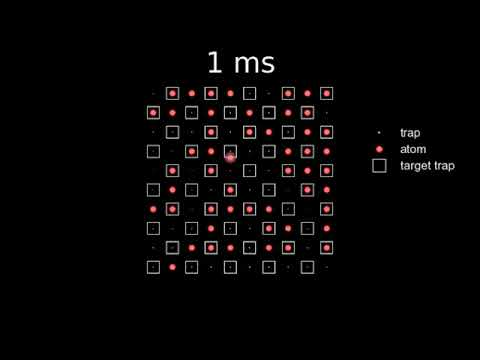

In [4]:
YouTubeVideo("jVC-ycr02tQ", width=600, height=450)

The video is [Atom by Atom Assembler](https://youtu.be/jVC-ycr02tQ?t=68)
from [Pasqal.io](https://pasqal.io).

Things to take away from the video:

- The traps are small enough that if two atoms inhabit a trap, they quickly
  collide and both bounce out of the trap.
- This means one can't try to completely fill the traps.
- Instead one creates approximately twice as many traps as needed, and then
  only fills the traps that are part of the pattern one wants to create.
- Moving an atom from one trap to another takes ~0.5 ms.
- Excess atoms are thrown out by the movable tweezers.

To make 3D sculptures, one has to repeat this process multiple times, once for
each layer of the sculpture.

## Trapping a single atom

Trapping a single atom in optical tweezers is itself a fairly complex process
(it was worth one half of the 2018 Nobel Prize).

I wanted to find a short but accurate visual representation, but I couldn't,
so instead I'll just highlight a few things:

- The tweezers have two different jobs -- to trap an atom and to
  cool it down.
- The trapping happens near focal points of the light.
- The cooling happens because the light doppler shifts slightly if the
  atom is moving.
- Trapping (fixing the position of the atom) and cooling the atom
  (fixing its momentum) are competing goals because of Hiesenberg's
  uncertainty principle.

## DiVicenzo criteria

We're going to end this tour of the experimental apparatus by talking
broadly about what is required to build a quantum computer. Some of
these requirements we'll be able to talk about straight away. The
rest will provide a bridge to what we'll look at next -- the quantum
mechanics of the atoms.

In 2000, DiVincenzo, a physicist at IBM wrote down
[a set of five criteria](https://en.wikipedia.org/wiki/DiVincenzo%27s_criteria)
for building a quantum computer {cite}`divincenzo `:

- ✅ **A scalable physical system with well-characterized qubits**:
  Neutral atoms do pretty well here. The qubits are provided
  by the atoms themselves. They're isolated from their surroundings, except
  for the laser light they're trapped in. They're neutral. There are lots of
  them (a couple of hundred is already achievable).

- ☐ **The ability to initialize the state of the qubits**:
  Neutral atoms are initialized using *optical pumping* -- a control laser
  is used to push all atoms into a particular quantum state. This works well,
  but it's experimentally still difficult to initialize *individual* atoms
  rather than all atoms at once. We're not going to cover this procedure
  in any detail in our simulations, we'll just assume it works.

- ✅ **Long decoherence times**
  Coherence times of many seconds are already achievable.

- ⭐ **A "universal" set of quantum gates**
  Implementing gates for neutral atoms is the focus of the majority of
  the rest of the tutorial. In short, gates that operate on a single
  atom work extremely well. Gates that operate on two atoms work,
  but need to work a lot better and are an area of active research.

- ☐ **A qubit-specific measurement capability**
  Neutral atoms are measured by causing them to fluoresce depending on what
  state they're in and by using the camera to capture the fluorescent light.
  There are some downsides to this procedure, notably that it measures all
  of the atoms at once and is destructive (i.e. the atoms are left in an
  unusable energy state). We're not going to examine this procedure in
  detail either, we'll just assume we can perform a destructive measurement
  at the end of a running a quantum circuit.

DiVincenzo also wrote down two criteria for building a quantum network:

- **The ability to interconvert stationary and flying qubits**
- **The ability to faithfully transmit flying qubits between specified**
  **locations**

We're not going to look at these in detail either. The *stationary* qubits
would be the neutral atoms. The *flying* qubits are typically photons
because they travel well through fibre optics. Having a neutral atom
transfer its quantum state to a photon seems possible, but I'm not aware of
any experiments that have been done.